In [1]:
import pandas as pd 
import numpy as np 
import os 
import time 
import regex as re
import math

In [2]:
from underthesea import word_tokenize

In [3]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [4]:
import regex as re
 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)


def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [9]:
 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

# Hàm chuyển Unicode dựng sẵn về Unicde tổ hợp (phổ biến hơn)
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]


nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def lowercase_remove_noise_character(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        words[index] = ''.join(cw)
    return ' '.join(words)

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [51]:
path_dataset1 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/Rawdata_Tri2.xlsx"
df1 = pd.read_excel(path_dataset1, sheet_name = 'Comment_Tiki_Data')
df1.dropna()

,Id,Review,Rating,Label
0,4000,Cám ơn Tiki đa giao hàng liên quận trong đợt c...,5,-2.0
1,4001,Sữa đậu nành vị tàu hũ gừng của Fami rất ngon ...,5,1.0
2,4002,"Tiki bán hàng giá giảm nhìu, mình sử dụng phươ...",5,-2.0
3,4003,Quá thất vọng Tiki trading giao 2 thùng sữa cũ...,1,-1.0
4,4004,Mình đã mua sp tiki va giá sale... rẽ nhìu so...,5,0.0
...,...,...,...,...
3996,7996,Dịch vụ chăm sóc khách hàng của Tiki vốn đã nổ...,3,0.0
3997,7997,"shop cho hơi ít vít vặn, tiết kiệm những thứ ...",4,-1.0
3998,7998,Mình mua rất nhiều SP của Tiki: Từ những Sp n...,1,0.0
3999,7999,Tiki xem lại nhà cung cấp này dùm. Quảng cáo 1...,1,0.0


In [52]:
df1.head()

,Id,Review,Rating,Label
0,4000,Cám ơn Tiki đa giao hàng liên quận trong đợt c...,5,-2.0
1,4001,Sữa đậu nành vị tàu hũ gừng của Fami rất ngon ...,5,1.0
2,4002,"Tiki bán hàng giá giảm nhìu, mình sử dụng phươ...",5,-2.0
3,4003,Quá thất vọng Tiki trading giao 2 thùng sữa cũ...,1,-1.0
4,4004,Mình đã mua sp tiki va giá sale... rẽ nhìu so...,5,0.0


In [53]:
path_dataset2 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/10k_14k.xlsx"
df2 = pd.read_excel(path_dataset2, sheet_name = 'Comment_Tiki_Data')
df2.dropna()
df2.head()

,Id,Review,Rating,Label,Unnamed: 4
0,1,Thịt heo rất tươi ngon và sạch. Mình mua thử l...,5,NaN,NaN
1,2,"Tuy shop Giao trễ nhưng tình hình dịch bệnh, v...",5,NaN,NaN
2,3,Thịt mỡ nhiều quá mn ạ huhu. Mình nấu c...,5,NaN,NaN
3,4,"Sản phẩm không nhãn mác thương hiệu, không hạn...",2,NaN,NaN
4,5,Mình thấy shipper bên shop mỗi lần giao rất nh...,4,NaN,NaN


In [54]:
path_dataset3 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/8k-10k14k-16k.xlsx"
df3 = pd.read_excel(path_dataset3, sheet_name = 'Comment_Tiki_Data')
df3.dropna()
df3.head()

,Id,Review,Rating,Label
0,1,Thịt heo rất tươi ngon và sạch. Mình mua thử l...,5,NaN
1,2,"Tuy shop Giao trễ nhưng tình hình dịch bệnh, v...",5,NaN
2,3,Thịt mỡ nhiều quá mn ạ huhu. Mình nấu c...,5,NaN
3,4,"Sản phẩm không nhãn mác thương hiệu, không hạn...",2,NaN
4,5,Mình thấy shipper bên shop mỗi lần giao rất nh...,4,NaN


In [55]:
path_dataset4 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/Rawdata-0-3000.xlsx"
df4 = pd.read_excel(path_dataset4, sheet_name = 'Comment_Tiki_Data')
df4.dropna()
df4.head()

,Id,Review,Rating,Label
0,1,Thịt heo rất tươi ngon và sạch. Mình mua thử l...,5,1.0
1,2,"Tuy shop Giao trễ nhưng tình hình dịch bệnh, v...",5,1.0
2,3,Thịt mỡ nhiều quá mn ạ huhu. Mình nấu c...,5,NaN
3,4,"Sản phẩm không nhãn mác thương hiệu, không hạn...",2,0.0
4,5,Mình thấy shipper bên shop mỗi lần giao rất nh...,4,0.0


In [56]:
#0: negative 
#1: positive
l_review = []
l_label = []


In [57]:
for index, row in df1.iterrows():
#     if int(row["Id"]) == 5000:
#         break
    review = row["Review"]
    label = row["Label"]
    if math.isnan(label):
#         print(index)
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_review.append(review)
    l_label.append(label)
    
        
#     if label == None
#     if not label:
#         print(label)

In [58]:
print(len(l_label))

2767


In [59]:
for index, row in df2.iterrows():
#     if int(row["Id"]) > 2002:
#         break
    review = row["Review"]
    label = row["Label"]
#     if math.isnan(label):
# #         print(index)
#         continue
    if label == "negative":
        label = 0
    elif label == "positive":
        label = 1
    else:
#         print(label, index)
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_review.append(review)
    l_label.append(label)
    
        
#     if label == None
#     if not label:
#         print(label)

In [60]:
print(len(l_label))

6210


In [61]:
for index, row in df3.iterrows():
#     if int(row["Id"]) >= 8000:
#         if int(row["Id"]) >= 12000:
#             break
    review = row["Review"]
    label = row["Label"]
    if math.isnan(label):
#             print(index)
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_review.append(review)
    l_label.append(label)

        
#     if label == None
#     if not label:
#         print(label)

In [62]:
print(len(l_label))
print(len(l_review))

8035
8035


In [63]:
for index, row in df4.iterrows():
#     if int(row["Id"]) >= 8000:
#         if int(row["Id"]) >= 12000:
#             break
    review = row["Review"]
    label = row["Label"]
    if math.isnan(label):
#             print(index)
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_review.append(review)
    l_label.append(label)

        
#     if label == None
#     if not label:
#         print(label)

In [64]:
print(len(l_label))
print(len(l_review))

9841
9841


In [ ]:
#Merger version 1 and version 2

In [33]:
path_dataset1_v1 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/Data_0_5k_sentiment.xlsx"
df1_v1 = pd.read_excel(path_dataset1_v1, sheet_name = 'Dataset')
df1_v1.dropna()
df1_v1.head()

,Unnamed: 0,Review,Label
0,0.0,"mjh mua hàng tiki rất nhiều , nhưng lần này rấ...",positive
1,1.0,"1hàng box đẹp, cài đặt dễ dàng qua app theo gi...",positive
2,2.0,"quá xuất sắc 5 sao lun , shiper ok giao hàng n...",positive
3,3.0,không hài lòng vì tiki giao hàng làm lỡ việc c...,negative
4,4.0,"bao bì đóng gói sản phẩm rất trang nhã, đủ phụ...",positive


In [36]:
path_dataset2_v1 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/Dataset_version1_BMT.xlsx"
df2_v1 = pd.read_excel(path_dataset2_v1, sheet_name = 'Label_Dataset3')
df2_v1.dropna()
df2_v1.head()

,Unnamed: 0,Review,label
0,0.0,mjh mua hàng tiki rất nhiều nhưng lần này rấ...,NaN
1,1.0,1hàng box đẹp cài đặt dễ dàng qua app theo gi...,NaN
2,2.0,quá xuất sắc 5 sao lun shiper ok giao hàng n...,positive
3,3.0,không hài lòng vì tiki giao hàng làm lỡ việc c...,positive
4,4.0,bao bì đóng gói sản phẩm rất trang nhã đủ phụ...,NaN


In [37]:
path_dataset3_v1 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/data20k-25k.xlsx"
df3_v1 = pd.read_excel(path_dataset3_v1, sheet_name = 'Sheet1')
df3_v1.dropna()
df3_v1.head()

,Unnamed: 0,Review,Label
0,20000.0,màu xanh khá lạ mắt. máy chính hãng mượt mà. c...,positive
1,20001.0,"Hàng nguyên seal nhé mn, cầm chắc chắn lắm, nó...",positive
2,20002.0,shop dao hàng nhanh nguyên sưu đúng sản phẩm,positive
3,20003.0,Đã lỡ mua nên phải xài. Máy ngoài chụp ảnh đẹp...,negative
4,20004.0,Quý shop giao hàng nhanh. Sản phẩm chính hãng....,positive


In [42]:
l_v1_review = []
l_v1_label = []


In [44]:
for index, row in df1_v1.iterrows():
    if index > 5000:
        break
    review = row["Review"]
    label = row["Label"]
    if label == "negative":
        label = 0
    elif label == "positive":
        label = 1
    else:
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_v1_review.append(review)
    l_v1_label.append(label)
    
        
print(len(l_v1_label))

4984


In [46]:
for index, row in df2_v1.iterrows():
    if index < 10000:
        continue
    if index >= 13000:
        break
    review = row["Review"]
    label = row["label"]
    if label == "negative":
        label = 0
    elif label == "positive":
        label = 1
    else:
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_v1_review.append(review)
    l_v1_label.append(label)
    
        
print(len(l_v1_label))

7886


In [49]:
for index, row in df3_v1.iterrows():
#     if index < 20000:
#         continue
#     if index >= 25000:
#         break
    review = row["Review"]
    label = row["Label"]
    if label == "negative":
        label = 0
    elif label == "positive":
        label = 1
    else:
        continue
    label = int(label)
    if label != 0 and label != 1:
        continue
    l_v1_review.append(review)
    l_v1_label.append(label)
    
        
print(len(l_v1_label))

12863


In [66]:
l_label.extend(l_v1_label)
l_review.extend(l_v1_review)

In [67]:
print(len(l_label))

22704


In [41]:
# '''
# LOG: Get special character excel 
# '''
# log_excel_character = ""
# for index, row in df1_v1.iterrows():
#     string_get = row["Review"]
# #     print(string_get)
#     log_excel_character = string_get[82:89]
#     print(log_excel_character)
#     break
    

In [50]:
# save_df = pd.DataFrame(columns=["Review", "Label"])
# save_df["Review"] = l_v1_review
# save_df["Label"] = l_v1_label
# save_df.to_excel("FullDataset_version1.xlsx",sheet_name='Dataset',index = True)

# **Clean Data**

In [68]:
def clean_data(l_review, l_label, special_excel_character):   
    l_convert_string = []
    l_convert_label = []
    l_len_word = []
    for index, review_str in enumerate(l_review):
        if type(review_str) != str:
            continue
        #remove "\n", duplicate blank space
        clean_string = review_str.replace("\n","")
#         clean_string = review_str.replace(special_excel_character,"")
        clean_string = " ".join(clean_string.split())

        #remove tag html
        clean_string = remove_html(clean_string)
        #remove emoji, special character
        clean_string = remove_emojis(clean_string)

        # format unicode
        unicode_string = covert_unicode(clean_string)
        #format vietnamese sign

        
        
#         #lowcase
        sign_string = lowercase_remove_noise_character(unicode_string)
        #get only vietnamese character
        sign_string = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]','',sign_string)
        sign_string = " ".join(sign_string.split())
        if len(sign_string) <= 1:
            continue
#         print(sign_string)
        #tokenize
        token_string = word_tokenize(sign_string, format="text")
        log_token = word_tokenize(sign_string)
        l_len_word.append(len(log_token))
        l_convert_string.append(token_string)
        l_convert_label.append(l_label[index])
    return l_convert_string, l_convert_label, l_len_word

In [69]:
l_convert_string, l_convert_label, l_len_word = clean_data(l_review,l_label, log_excel_character)

In [70]:
print(len(l_convert_string))


22699


In [73]:
print(l_convert_string[-10:])

['đóng gói chắc_chắn giao hàng đúng theo ngày đã dự_kiến 45 ngày mở ra thì 2 chai khá đầy vòi xịt dễ_dàng mới dùng nhưng không thích mùi lắm hơi hóa_học mùi nồng hơn trésemme và headshoulder trước dùng còn hiệu_quả thì chưa rõ_ràng lắm có_vẻ tóc mềm mượt hơn 1 xíu vì mới gội 1 lần', 'tiki đóng_gói rất cẩn_thận giao hàng nhanh mình ko nghĩ sẽ được nhận quà đâu nhưng bất_ngờ luôn dầu gội và xả rất thơm nha 3 hôm sau vẫn còn thơm còn hiệu_quả giảm rụng thì cần thời_gian theo_dõi', 'giao hàng trể chấp nhân đươc mua hang có quà tăng đi kèm hầu_như các đai lý đều không giao quà tăng ăn chăn bớt quà tăng của khách tiki quản cáo mua có quà tăng giao hàng lại không có vây ai mà còn mua hàng rồi lấy qua tăng bán lai dịch ngươi ta còn lên tiki mua hàng làm_ăn kiểu này ai còn mua nữa tôi mong nơi bán hàng trả lai quà tăng cho khách không thì làm_ăn đươc bao_lâu đâu', 'mình từng đặt_hàng trên tiki rất nhiều và luôn cảm_thấy tin_tưởng về khâu đóng_gói giao hadng cũng như chất_lượng sản_phẩm của tiki

In [40]:
# import random 
# random.shuffle(l_convert_string)

In [75]:
save_df = pd.DataFrame(columns=["Review", "Label"])
save_df["Review"] = l_convert_string
save_df["Label"] = l_convert_label
save_df.to_excel("Dataset_24_12_version1Mergeversion2.xlsx",sheet_name='Dataset',index = True)

In [19]:
# multilable_dataset = pd.DataFrame()

# multilable_dataset = pd.DataFrame(columns=["Review", "Van chuyen", "Hang hoa"])
# multilable_dataset["Review"] = l_convert_string

# multilable_dataset.to_excel("multilable_dataset.xlsx",sheet_name='Dataset',index = True)


# **ReClean and Merge dataset**

In [8]:
path_dataset = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/data20k-25k.xlsx"
df = pd.read_excel(path_dataset, sheet_name = 'Sheet1')

In [9]:
path_dataset2 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/Data_0_5k_sentiment.xlsx"
df2 = pd.read_excel(path_dataset2, sheet_name = 'Dataset')

In [10]:
l_review = []
l_label = []

for index, row in df.iterrows():
    review = row["Review"]
    label = row["Label"]
    l_review.append(review)
    l_label.append(label)
    
for index, row in df2.iterrows():
    review = row["Review"]
    label = row["Label"]
    l_review.append(review)
    l_label.append(label)
    if index >= 5000:
        break
    

In [11]:
print(len(l_review))

10026


In [12]:

l_convert_review = []
l_convert_label = []
# nagative 0
# positive 1
# None 2

l_len_word = []
for index, review in enumerate(l_review):
    review_str = review
    label = l_label[index]
    if type(review_str) != str:
        print(type(review_str))
        continue
    #remove "\n", duplicate blank space
    clean_string = review_str.replace("\n","")
    clean_string = " ".join(clean_string.split())
    
    #remove tag html
    clean_string = remove_html(clean_string)
    #remove emoji, special character
    clean_string = remove_emojis(clean_string)
    
    # format unicode
    unicode_string = covert_unicode(clean_string)
    #format vietnamese sign
    
    if len(unicode_string) <= 1:
        continue
    sign_string = lowercase_remove_noise_character(unicode_string)
    sign_string = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]','',sign_string)
    sign_string = " ".join(sign_string.split())
    token_string = word_tokenize(sign_string, format="text")
    log_token = word_tokenize(sign_string)
    if len(token_string) <= 1:
        continue
    
    if label == "negative":
        label = 0
    elif label == "positive":
        label = 1
    else:
        label = 2
    l_len_word.append(len(log_token))
    l_convert_review.append(token_string)
    l_convert_label.append(label)

NameError: name 'l_review' is not defined

In [13]:
print(len(l_convert_review))

10023


In [14]:
# print(l_convert_review[:100])

In [15]:
save_df = pd.DataFrame(columns=["Review", "Label"])
save_df["Review"] = l_convert_review
save_df["Label"] = l_convert_label
save_df.to_excel("Merge_0-5k_20-25k.xlsx",sheet_name='Dataset',index = True)

In [55]:
l_convert_review = l_convert_string

# **EDA DATA**

In [56]:
#Log freq word in all labels
dictionary_all = {}
for index, sentence in enumerate(l_convert_review):
#     if l_label[index] == 2:
    tmp = sentence.split(" ")
    for word in tmp:
        if word in dictionary_all:
            dictionary_all[word] += 1
        else:
            dictionary_all[word] = 1
sorted_freq_all = {k: v for k, v in sorted(dictionary_all.items(), key=lambda item: item[1],reverse=True)}


In [57]:
#Log in negative
dictionary_negative = {}
for index, sentence in enumerate(l_convert_review):
    if l_convert_label[index] == 0:
        tmp = sentence.split(" ")
        for word in tmp:
            if word in dictionary_negative:
                dictionary_negative[word] += 1
            else:
                dictionary_negative[word] = 1
sorted_freq_negative = {k: v for k, v in sorted(dictionary_negative.items(), key=lambda item: item[1],reverse=True)}

In [58]:
#Log in positive
dictionary_positive = {}
for index, sentence in enumerate(l_convert_review):
    if l_convert_label[index] == 1:
        tmp = sentence.split(" ")
        for word in tmp:
            if word in dictionary_positive:
                dictionary_positive[word] += 1
            else:
                dictionary_positive[word] = 1
sorted_freq_positive = {k: v for k, v in sorted(dictionary_positive.items(), key=lambda item: item[1],reverse=True)}


In [59]:
#Log in None
dictionary_none = {}
for index, sentence in enumerate(l_convert_review):
    if l_convert_label[index] == 2:
        tmp = sentence.split(" ")
        for word in tmp:
            if word in dictionary_none:
                dictionary_none[word] += 1
            else:
                dictionary_none[word] = 1
sorted_freq_none = {k: v for k, v in sorted(dictionary_none.items(), key=lambda item: item[1],reverse=True)}


In [60]:
#Log top 30
log_freq = []
log_ratio = []
log_freq_negative = []
log_freq_positive = []
log_freq_none = []
count = 0
for key in sorted_freq_all.keys():
    count += 1
    if count >= 30:
        break
    freq_total = sorted_freq_all[key]
    freq_negative = sorted_freq_negative[key]
    freq_positive = sorted_freq_positive[key]
    if key not in sorted_freq_none:
        freq_non = 0
    else:
        freq_non = sorted_freq_none[key]
    ratio = freq_negative / freq_positive
    log_freq_negative.append(freq_negative)
    log_freq_positive.append(freq_positive)
    log_freq_none.append(freq_non)
    log_freq.append(key)
    

In [61]:
print(log_freq)

['hàng', 'mình', 'không', 'có', 'rất', 'mua', 'thì', 'là', 'và', 'sản_phẩm', 'được', 'nên', 'giao', 'nhưng', 'tiki', 'dùng', 'này', 'cho', 'như', 'tốt', 'ko', '1', 'bị', 'mà', 'với', 'thấy', 'để', 'của', 'cũng']


# **Plot bar char**

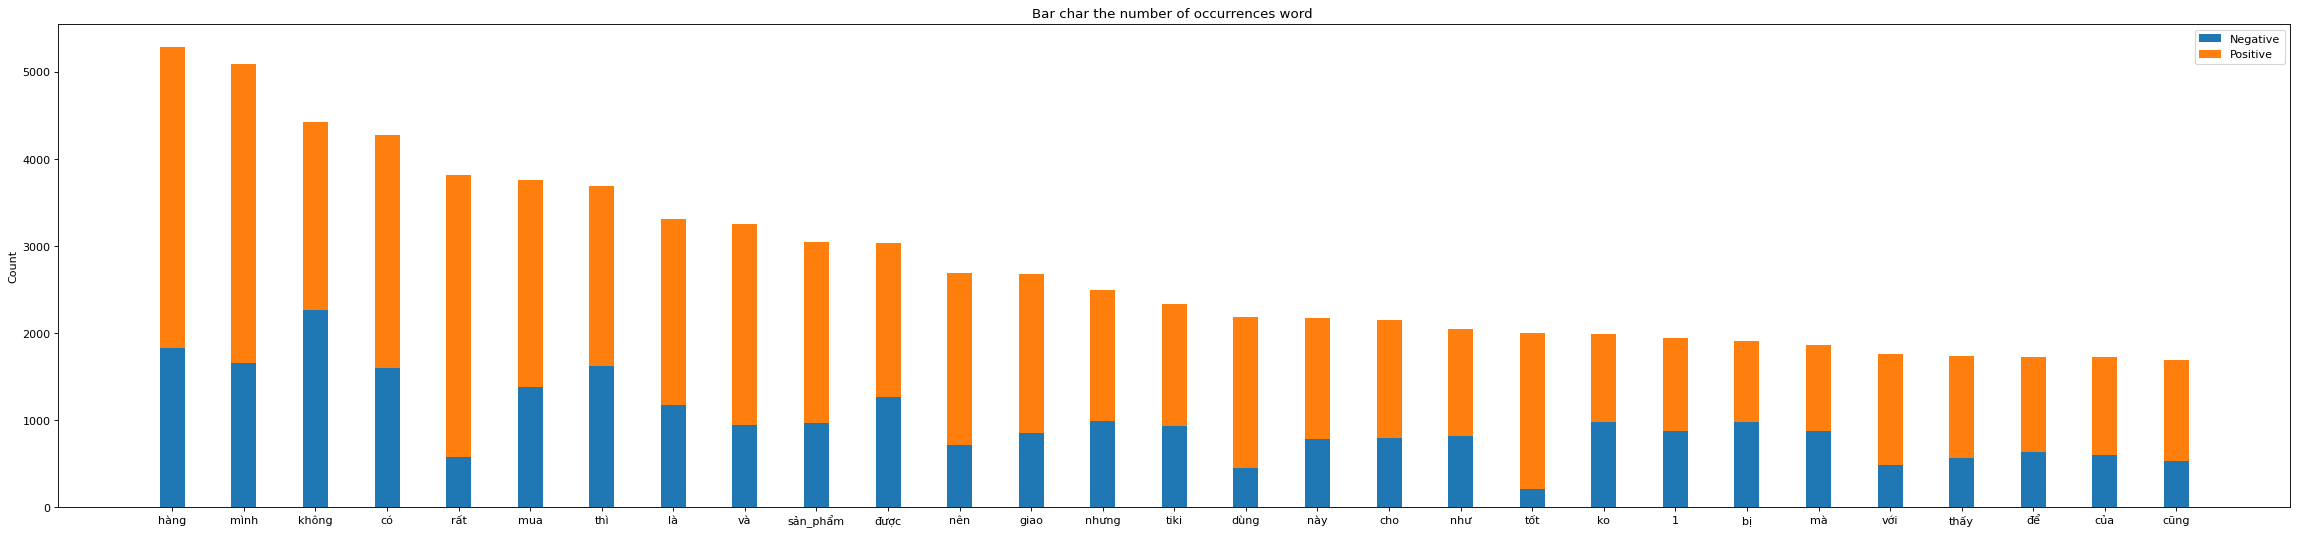

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 24), dpi=800)
# plt.rcParams.update({'font.size': 18})
ind = np.arange(len(log_freq_negative))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_negative, width)
p2 = plt.bar(ind, log_freq_positive, width, bottom = log_freq_negative)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word ')
plt.xticks(ind, log_freq)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'))

plt.show()


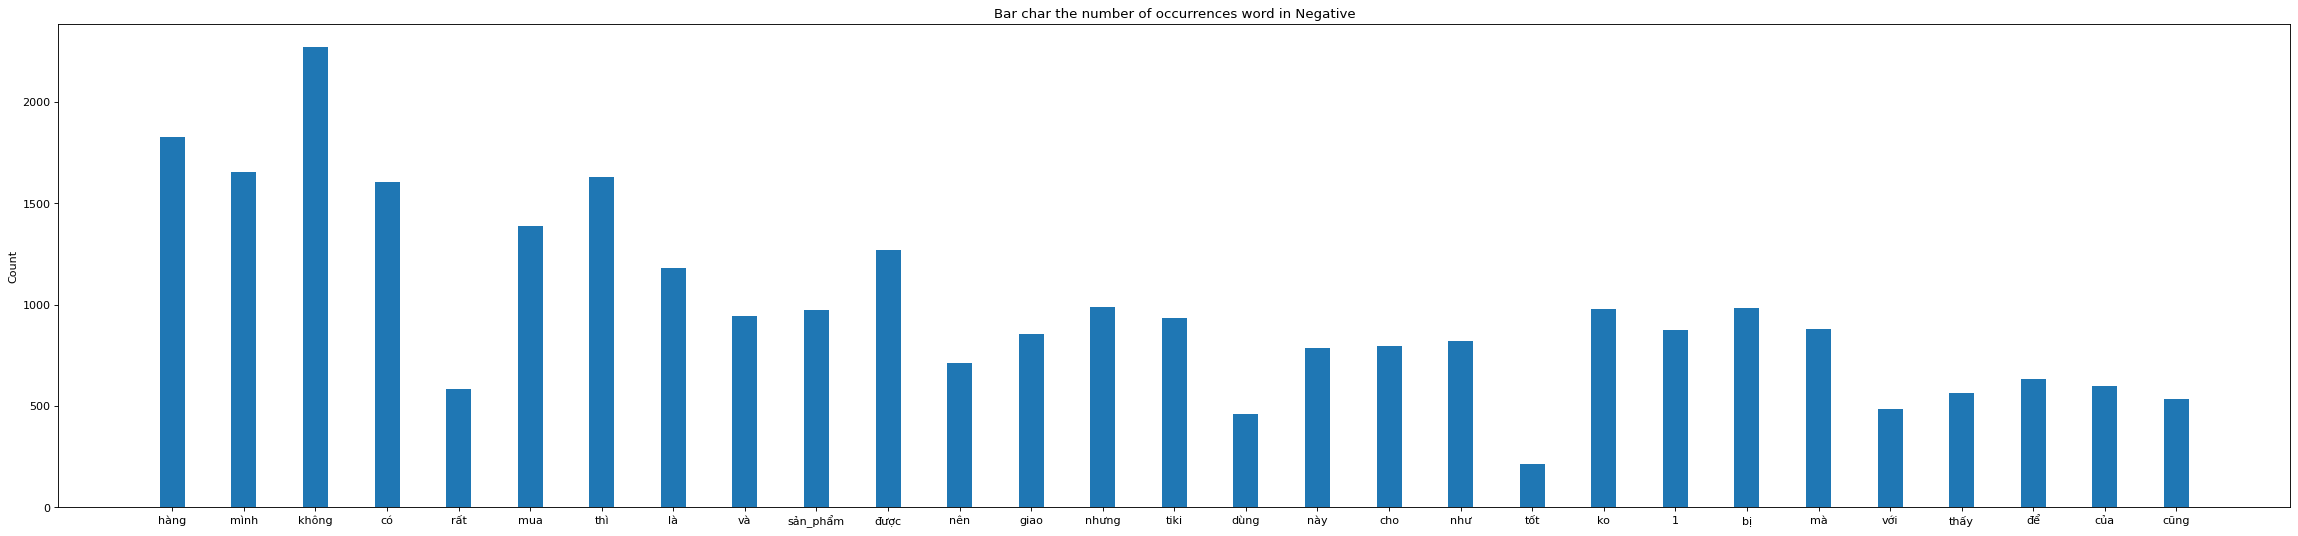

In [63]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 24), dpi=800)
# plt.rcParams.update({'font.size': 18})
ind = np.arange(len(log_freq_negative))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_negative, width)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word in Negative')
plt.xticks(ind, log_freq)


plt.show()


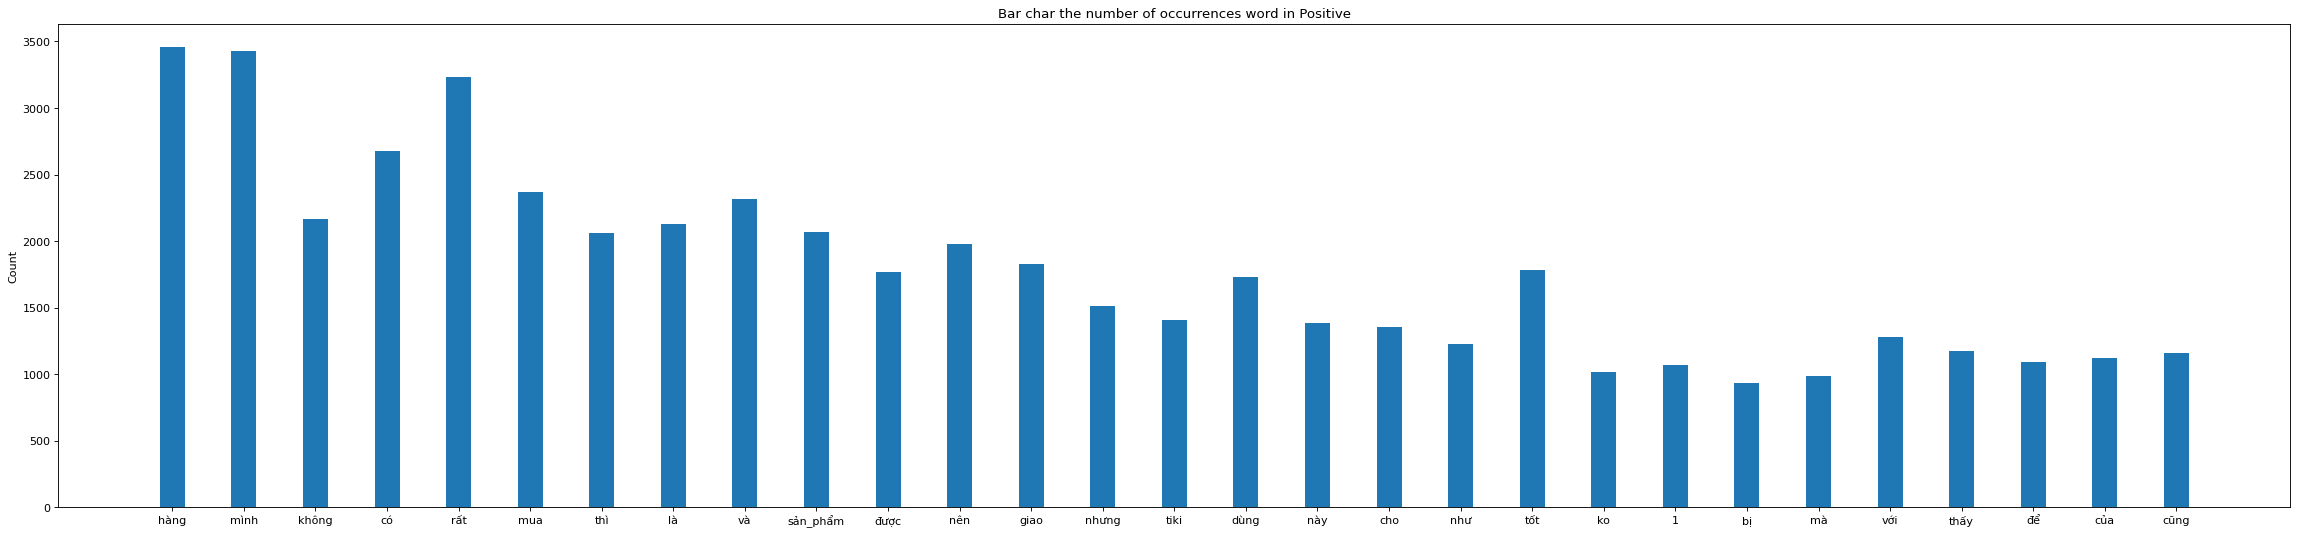

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 24), dpi=800)
# plt.rcParams.update({'font.size': 18})
ind = np.arange(len(log_freq_positive))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_positive, width)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word in Positive')
plt.xticks(ind, log_freq)

plt.show()


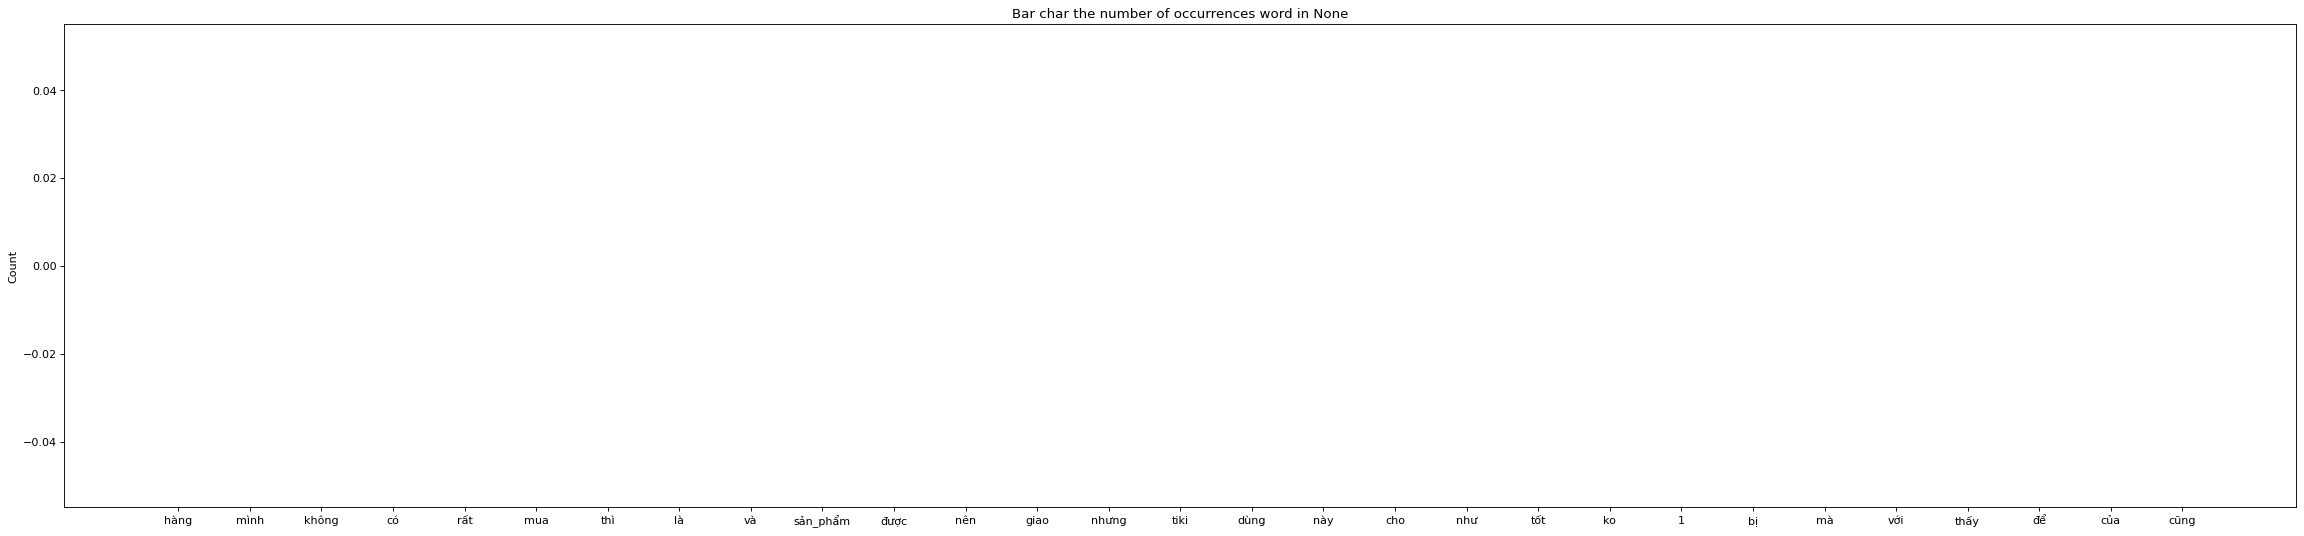

In [65]:
import numpy as np
import matplotlib.pyplot as plt
ind = np.arange(len(log_freq_none))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_none, width)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word in None')
plt.xticks(ind, log_freq)

plt.show()


# **PLot Histogram**

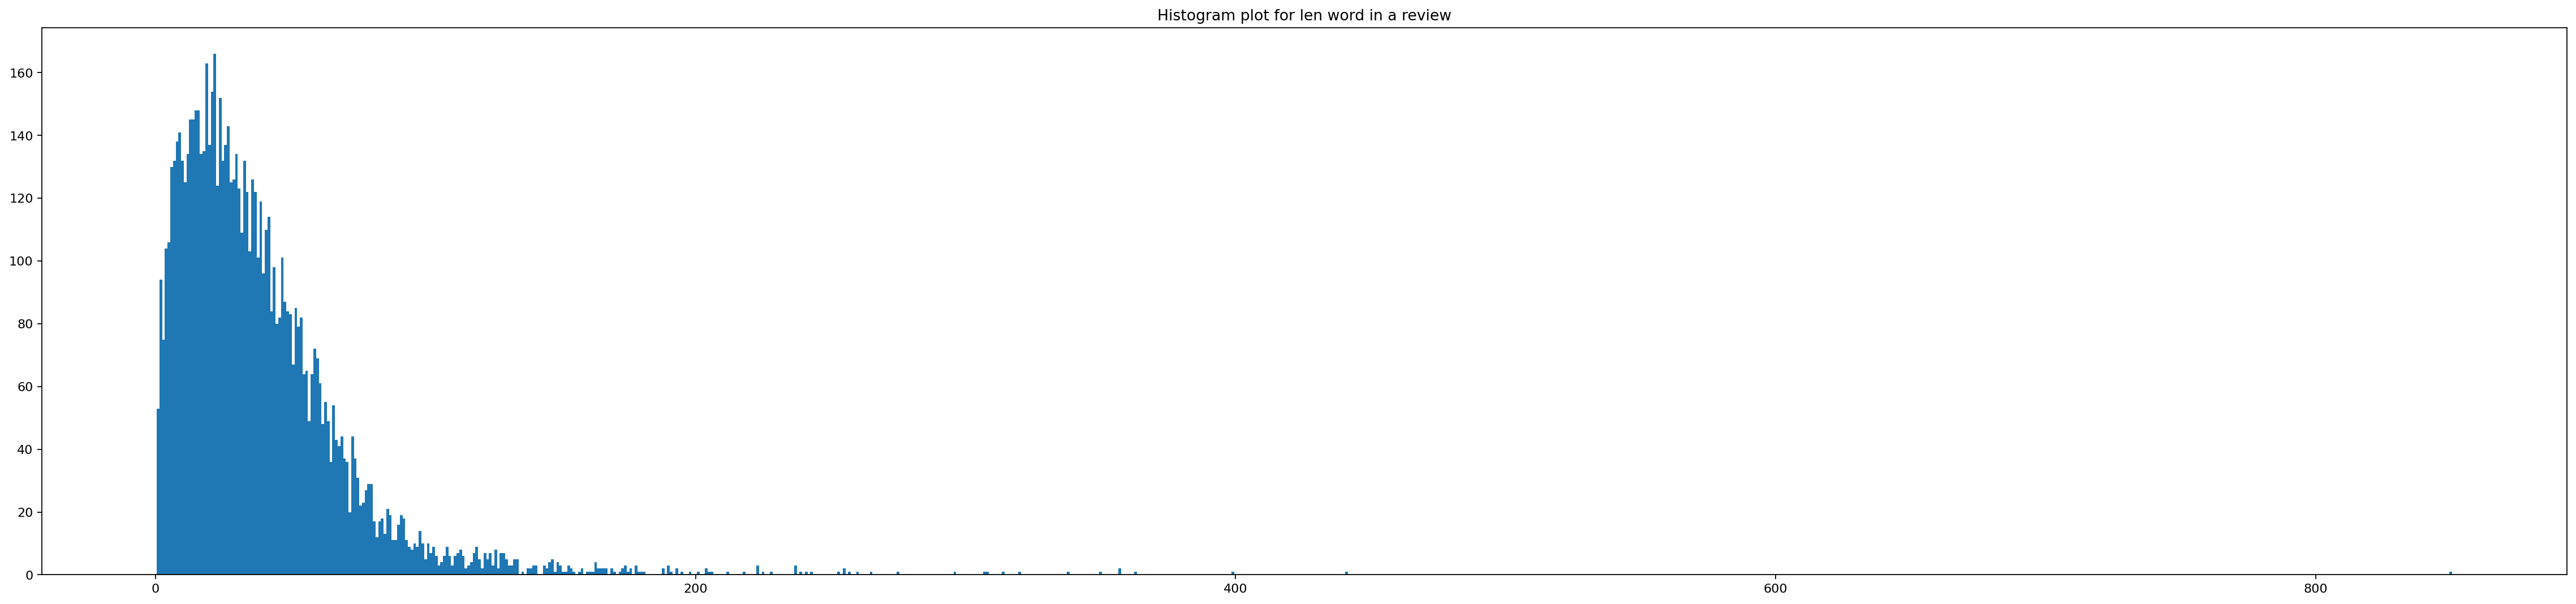

In [72]:
#Histogram plot for len word in a review

review_data = np.array(l_len_word)
fig = plt.figure(figsize =(36, 8), dpi=160)
d = np.diff(np.unique(review_data)).min()
left_of_first_bin = review_data.min() - float(d)/2
right_of_last_bin = review_data.max() + float(d)/2
plt.title('Histogram plot for len word in a review')
plt.hist(review_data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

# **Plot Box plot**

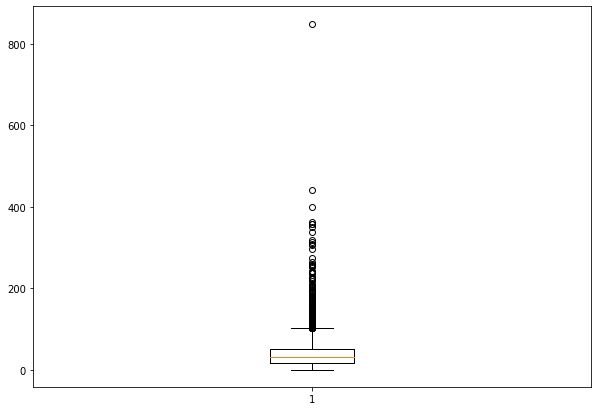

In [73]:
#Plot Box plot for len word in a review
data = np.array(l_len_word)
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

# **Preprocessing**
Remove StopWord and set max length sentence

Set top 30 stop word
Set max length = 200

In [13]:
#Reload data 
path_dataset = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Clean_dataset.xlsx"
dataframe = pd.read_excel(path_dataset, sheet_name = 'Dataset')


In [17]:
dataframe.head()

,Unnamed: 0,Review,Label_Ship,Label_SP
0,0.0,giao hàng đúng hẹnáo đẹpđường may chắc chắnsho...,1.0,1.0
1,1.0,giao hàng đúng hẹnáo đẹpđường may chắc chắnsho...,1.0,1.0
2,2.0,lần đâu mua hàng tại tiki mình rất hài lònggia...,1.0,0.0
3,3.0,không hài_lòng sản_phẩm có size quá nhỏ để dùn...,1.0,1.0
4,4.0,hàng chính hãng giá tốt sản_phẩm tốt như giới_...,0.0,1.0


In [74]:
# log_freq
MAX_LENGTH = 200

In [75]:
def remove_stop_word(sentence, log_stopword):
    for word in log_stopword:
        sentence = sentence.replace(word,"")
    return sentence
def set_length_sentence(sentence):
    tmp = sentence.split(" ")
    if len(tmp) > MAX_LENGTH:
        tmp = tmp[:MAX_LENGTH]
        print("set length")
    sentence = " ".join(tmp)
    return sentence

In [76]:
log_stopword = ["hàng", "mình","có","mua", "giao", "thì", "sản_phẩm","là", "và", "nhưng", "nên", "shop", "tiki", "cho", "như", "1", "ko", "này", "với"]
print(len(log_stopword))

19


In [77]:
l_convert_review_nonstopword = []
l_convert_label_nonstopword  = []
for index, review in enumerate(l_convert_review):
    un_stopword_review = remove_stop_word(review,log_stopword)
    review = set_length_sentence(un_stopword_review)
    if len(review) < 1:
        continue
    l_convert_review_nonstopword.append(review)
    l_convert_label_nonstopword.append(l_convert_label[index])
    

set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length
set length


In [35]:
l_convert_review = []
l_label_ship = []
l_label_sp = []
for index, row in dataframe.iterrows():
    if pd.isnull(dataframe.at[index,'Label_Ship']) or pd.isnull(dataframe.at[index,'Label_SP']):
        continue
    review = str(row["Review"])
    label_ship = int(row["Label_Ship"])
    label_sp = int(row["Label_SP"])
    if label_ship != 0 and label_ship != 1:
        print(label_ship)
    if label_sp != 0 and label_sp != 1:
        print(label_sp)  
    
    un_stopword_review = remove_stop_word(review,log_stopword)
    review = set_length_sentence(review)
    l_convert_review.append(review)
    l_label_ship.append(label_ship)
    l_label_sp.append(label_sp)


set length
set length
set length
set length
set length
set length
set length
set length
set length
set length


In [78]:
save_df = pd.DataFrame(columns=["Review", "Label"])
save_df["Review"] = l_convert_review_nonstopword
save_df["Label"] = l_convert_label_nonstopword

save_df.to_excel("Dataset_23_12_non_stopword.xlsx",sheet_name='Dataset',index = True)